### Import all the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Read the dataset

In [3]:
data= pd.read_csv('Iris.csv')

### View the dimensions of the dataset

In [4]:
data.shape

(150, 6)

In [5]:
data.head(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Drop the target variable 'Species', assuming we do not know it

In [11]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

### We do not know the optimal number of clusters so we start with a random guess of 5

In [21]:
model = KMeans(n_clusters=5)
y_clusters = model.fit_predict(X)
print(y_clusters)

model.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 4 0 4 0 4 0 4 4 4 4 0 4 0 4 4 0 4 0 4 0 0
 0 0 0 0 0 4 4 4 4 0 4 0 0 0 4 4 4 0 4 4 4 4 4 0 4 4 3 0 2 3 3 2 4 2 3 2 3
 3 3 0 3 3 3 2 2 0 3 0 2 0 3 2 0 0 3 2 2 2 3 0 0 2 3 3 0 3 3 3 0 3 3 3 0 3
 3 0]


array([[6.24722222, 2.84722222, 4.775     , 1.575     ],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143]])

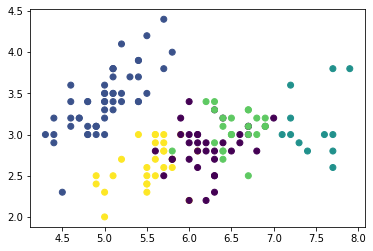

In [22]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c= y_clusters)

### Elbow Method
To find the number of optimal clusters, we need to run the k-means clustering algorithm for a range of k values and compare the results.

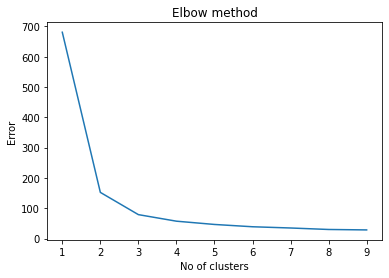

In [16]:
Error =[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

From the plot above, we see the elbow is formed at k=3. Hence, the optimal number of clusters for our model is 3

In [17]:
model = KMeans(n_clusters=3)
y_clusters = model.fit_predict(X)
print(y_clusters)

model.cluster_centers_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Text(0.5, 1.0, 'K-Means with optimal clusters ')

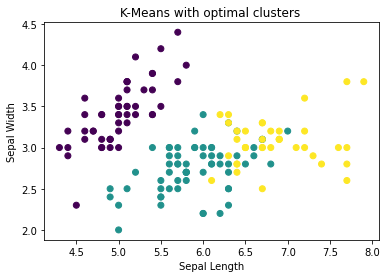

In [18]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c= y_clusters)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means with optimal clusters ')